## Procesamiento de Audio
# Prof. Lucas Terissi (lterissi@fceia.unr.edu.ar)

### Librerías

In [2]:
!pip install soundfile
!pip install speechrecognition
!pip3 install google-cloud-speech

!wget https://github.com/fvillena/dcc-ia-nlp/raw/master/data/0011.wav
!wget https://github.com/fvillena/dcc-ia-nlp/raw/master/data/0111.wav

--2020-11-12 15:16:04--  https://github.com/fvillena/dcc-ia-nlp/raw/master/data/0011.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/0011.wav [following]
--2020-11-12 15:16:05--  https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/0011.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8422 (8.2K) [audio/wav]
Saving to: ‘0011.wav’

0011.wav            100%[===================>]   8.22K  --.-KB/s    in 0s      

2020-11-12 15:16:05 (77.0 MB/s) - ‘0011.wav’ saved [8422/8422]

--2020-11-12 15:16:05--  https://github.com/fvillena/dcc-ia-nlp/raw/master/da

In [3]:
import librosa # for working with audio in python
import librosa.display # for waveplots, spectograms, etc
import soundfile as sf # for accessing file information
import IPython.display as ipd # for playing files within python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Leer archivo de audio

In [4]:
wave_file = './0011.wav'
info = sf.info(wave_file)
x, sample_rate = librosa.load(wave_file, sr=None)
print('Duración:', info.duration, 'secs')
print('Frecuencia de muestreo:', info.duration, 'Hz')
print('Tamaño:', info.frames, 'muestras')


Duración: 0.3799546485260771 secs
Frecuencia de muestreo: 0.3799546485260771 Hz
Tamaño: 4189 muestras


### Visualizar forma de onda

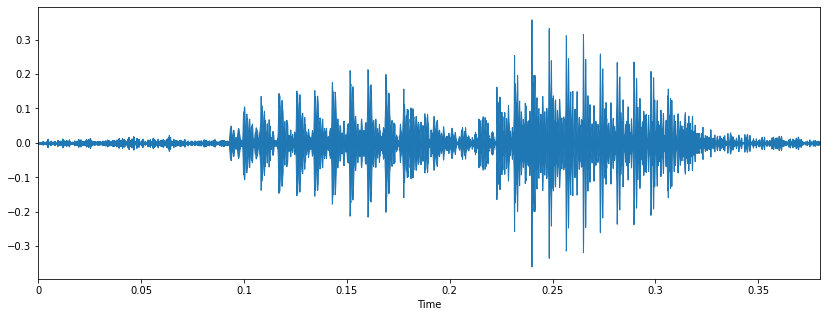

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sample_rate)

### Espectrograma

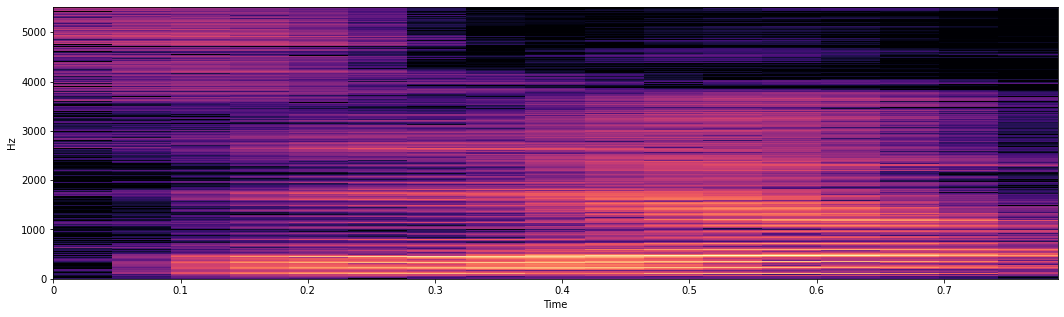

In [17]:
fig = plt.figure(figsize=(18, 5))
#fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax = fig.add_subplot(1,1,1)
hop_length = 256  # Ventana FFT
D = librosa.amplitude_to_db(np.abs(librosa.stft(x, hop_length=hop_length)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sample_rate)
#TODO
#no muestra la escala en dB (hay un lio con la version matplotlib)
#fig.colorbar(img, ax=ax, format="%+2.f dB")

### **Actividad 1.** ¿Qué sucede al cambiar el tamaño de la ventana (hop_length)?

### Comparar espectrogramas

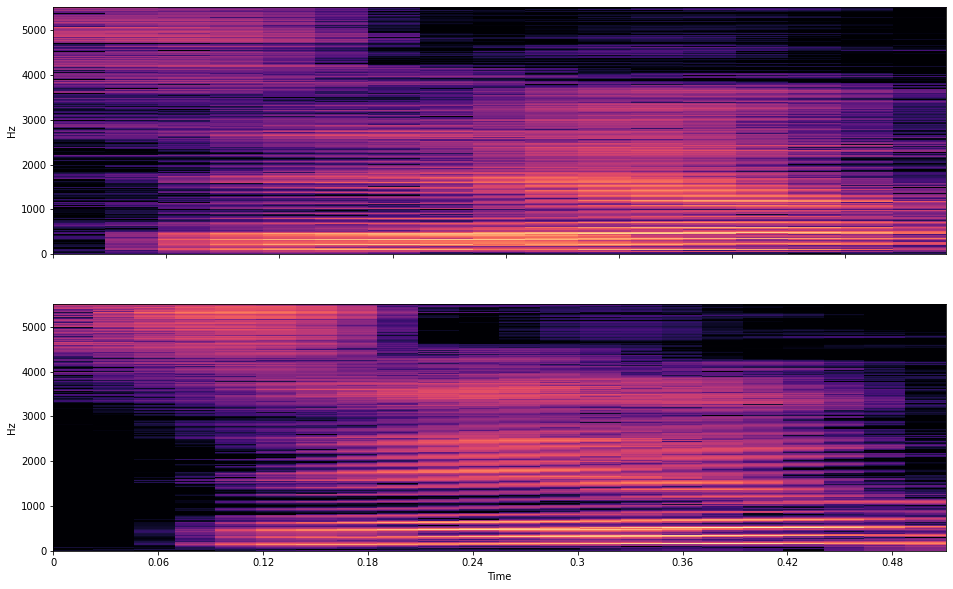

In [7]:
wave1 = './0011.wav'
x1, sample_rate1 = librosa.load(wave1, sr=None)
wave2 = './0111.wav'
x2, sample_rate2 = librosa.load(wave2, sr=None)
sample_rate = sample_rate1  # Para este caso son iguales

hop_length = 256  # Ventana FFT
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

D1 = librosa.amplitude_to_db(np.abs(librosa.stft(x1, hop_length=hop_length)), ref=np.max)
img = librosa.display.specshow(D1, y_axis='linear', x_axis='time', sr=sample_rate, ax=ax[0])
ax[0].label_outer()

D2 = librosa.amplitude_to_db(np.abs(librosa.stft(x2, hop_length=hop_length)), ref=np.max)
librosa.display.specshow(D2, y_axis='linear', sr=sample_rate, hop_length=hop_length, x_axis='time', ax=ax[1])
ax[1].label_outer()

#TODO
#fig.colorbar(img, ax=ax, format="%+2.f dB")

### **Actividad 2**. Los archivos de ejemplo siguen la notacion: DSSR.wav, donde D es el digito, SS el sujeto, y R la repetición. Compare los histogramas de diferentes sujetos, para un mismo dígito, y diferentes dígitos. ¿Que similitudes y diferencias observa?

In [ ]:
#hint: !wget https://github.com/fvillena/dcc-ia-nlp/raw/master/data/DSSR.wav
#PROGRAMAR AQUI

### Mel Cepstral

[Text(0.5, 1.0, 'MFCC')]

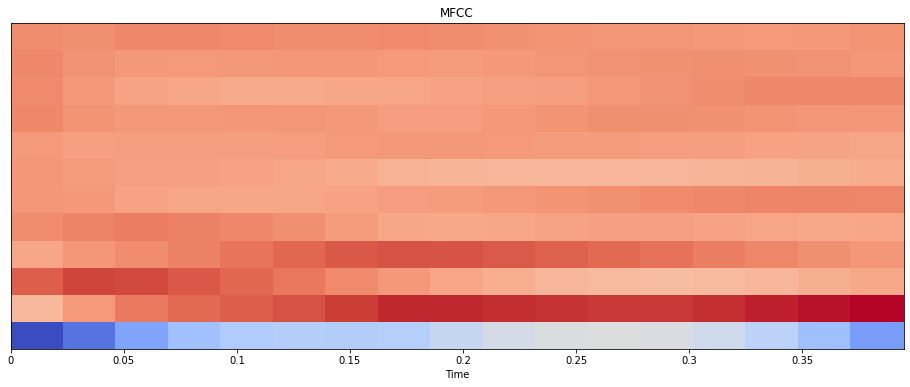

In [8]:
hop_length = 256
mfccs = librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=12, hop_length = hop_length)
fig, ax = plt.subplots(figsize=(16, 6))
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
#fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

### Cepstral por frame

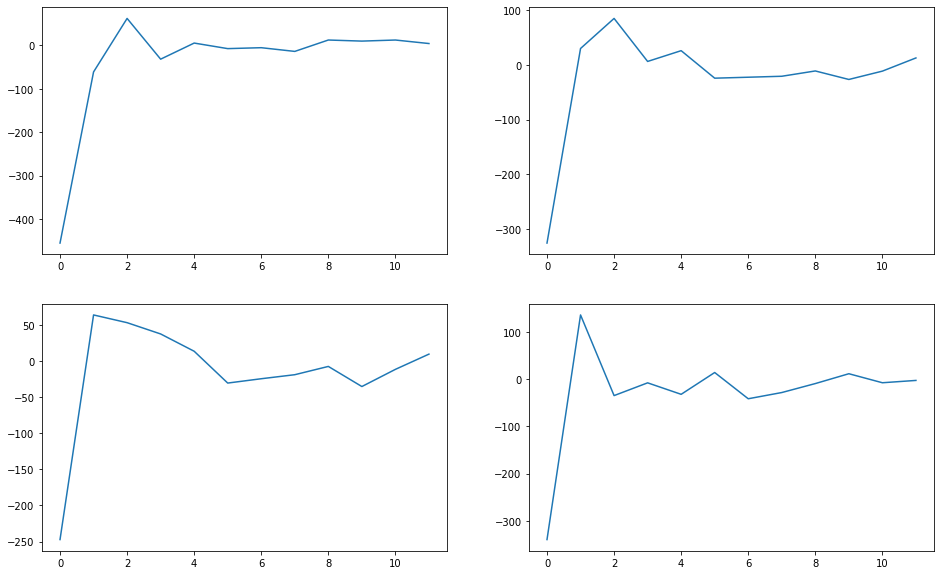

In [9]:
hop_length = 512
mfccs = librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=12, hop_length = hop_length)

mfccs_f0 = mfccs[:,0]
mfccs_f1 = mfccs[:,1]
mfccs_f2 = mfccs[:,2]
mfccs_f3 = mfccs[:,8]

plt.figure(figsize=(16, 10))
plt.subplot(221)
plt.plot(mfccs_f0)
plt.subplot(222)
plt.plot(mfccs_f1)
plt.subplot(223)
plt.plot(mfccs_f2)
plt.subplot(224)
plt.plot(mfccs_f3)

#cada grafico es 1 tiempo con todos los cuadros

## **Actividad 3.** Repita los graficos de coeficientes mel-cepstral para los sonidos 0011 y 0111 y compare. 



In [ ]:
#PROGRAMAR aqui

## Grabar audio desde mic

In [10]:
!pip install ffmpeg-python

In [11]:


"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

## **Actividad 4.** Grabe un sonido y visualice amplitud, espectrograma, y coeficientes mel-cepstral.

In [19]:
audio, sr = get_audio()

[  0   0   0 ... -24 -33 -38]
48000


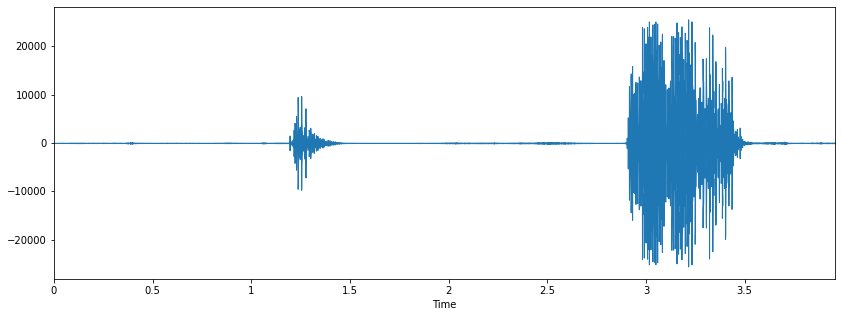

In [20]:
plt.figure(figsize=(14, 5))
print(audio)
print(sr)
librosa.display.waveplot(audio.astype(np.float32), sr=sr)

In [22]:
#PROGRAMAR AQUI

## Python Speech Recognition Package

Librería simple que soporta las siguientes APIs:

* CMU Sphinx (works offline)
* Google Speech Recognition
* Google Cloud Speech API
* Wit.ai
* Microsoft Bing Voice Recognition
* Houndify API
* IBM Speech to Text
* Snowboy Hotword Detection (works offline)

In [26]:
import speech_recognition as spr
r = spr.Recognizer()

### Texto a partir de un archivo de audio

In [27]:
!wget https://github.com/fvillena/dcc-ia-nlp/raw/master/data/test.wav

harvard = spr.AudioFile('./test.wav')
with harvard as source:
    audio = r.record(source)
text = r.recognize_google(audio, language='es', show_all = True)
print(text)

--2020-11-12 15:46:48--  https://github.com/fvillena/dcc-ia-nlp/raw/master/data/test.wav
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/test.wav [following]
--2020-11-12 15:46:48--  https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/test.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 538574 (526K) [audio/wav]
Saving to: ‘test.wav.4’

test.wav.4          100%[===================>] 525.95K  --.-KB/s    in 0.05s   

2020-11-12 15:46:48 (9.68 MB/s) - ‘test.wav.4’ saved [538574/538574]

{'alternative': [{'transcript': 'Hola Esto es una prueba de audio m

## **Actividad 5.** Ahora grabe una oracion y pruebe reconocer el texto. Evalue las funciones de reduccion de ruido disponibles.

In [ ]:
## r.adjust_for_ambient_noise(source)   # <-- Para resolver problemas de ruido ambiente (no siempre ayuda)